In [1]:
from io import open
from pathlib import Path
from conllu import parse_incr
from conllu import parse

In [5]:
data_file = open("en_gum-ud-train.conllu", "r", encoding="utf-8")
sents = Path("en_gum-ud-train.conllu").read_text().strip().split('\n\n')

In [6]:
print(len(sents))

12544


In [7]:

relative_clauses = []

for sent in sents:
    for token in parse(sent):
        for i, t in enumerate(token):
            if t['deprel'] =='acl:relcl':
                relative_clauses.append(sent)
relative_clauses = set(relative_clauses)


In [11]:
with open('pc.txt', 'w') as relative:
    for sent in pc:
        for s in sent.split('\n'):
            if s.startswith('# text = '):
                raw = s[len('# text ='):]
                relative.write(f'{raw}\n')

1726


In [12]:
file = open('relative.conllu', 'r')
sents = [x for x in parse_incr(file)]

In [13]:
from collections import Counter
possible_rel=[]
pc =[]
prc =[]
advc =[]
advrc =[]
sc =[]
src =[]
oc =[]
orc =[]
others =[]
others_r =[]
m =[]
relative_clauses = list(relative_clauses)
for j, sent in enumerate(sents):

    tokens = [tok for tok in sent]
    for i, token in enumerate(sent):
        if token['deprel']=='acl:relcl':
            id = token['id']
            head_tok = [x for x in tokens if x['id']==token['head']][0]
            head_tok_dep = [x[0] for x in head_tok['deps'] if x[1]==id]
            dependents = [x['feats'] for x in tokens if x['head']==id]
            dependents =[x for x in dependents if x!=None and 'Rel' in list(x.values())]
            # print(dependents)
            if head_tok_dep:
                dep = head_tok_dep[0]
                if 'pass' in dep and dependents!=[]:
                    pc.append(relative_clauses[j])
                elif 'pass' in dep:
                    prc.append(relative_clauses[j])
                elif 'nsubj' in dep and dependents!=[]:
                    print(dependents)
                    sc.append(relative_clauses[j])
                elif 'nsubj' in dep:
                    src.append(relative_clauses[j])
                elif 'obj' in dep and dependents!=[]:
                    oc.append(relative_clauses[j])
                elif 'obj' in dep:
                    orc.append(relative_clauses[j])
                elif 'obl' in dep and dependents!=[]:
                    advc.append(relative_clauses[j])
                elif 'obl' in dep:
                    advrc.append(relative_clauses[j])
                else:
                    m.append(relative_clauses[j])
#                   subject_clause.append(re)
                possible_rel.append(head_tok_dep[0])
            else:
                if dependents:
                # print(list(relative_clauses)[j])
                    others.append(relative_clauses[j])
                else:
                    others_r.append(relative_clauses[j])


# #
# print(len(others))

#
print(Counter(possible_rel).most_common())
print(len(possible_rel))
print(len(others))

In [14]:
with open('ud_train.amconll', 'w') as amconll:
    j=0
    for sent in relative_clauses:
        j+=1
        amconll.write("#git::dakfl2343213rffdfvl\n")
        amconll.write("#framwork: unkonwn\n")
        amconll.write(f"#id:{j}\n")
        for token in parse(sent):
            for i, t in enumerate(token):
                if '.' not in str(t['id']) and '-' not in str(t['id']):
                    id =t['id']
                    form = t['form']
                    upos = t['upos']
                    feats = t['feats']
                    lemma = t['lemma']
                    xpos =t['xpos']
                    dep =t['deprel']
                    head =t['head']
                    if feats==None:
                        feats ='_'
                    if dep ==None:
                        dep='_'
                    if head ==None:
                        head ='_'
                    amconll.write(f'{id}\t{t}\t{lemma}\t{upos}\t{xpos}\t{feats}\t{head}\t{dep}\n')
                else:
                    continue
        amconll.write('\n')






In [15]:
import matplotlib.pyplot as plt

# Data
labels = ['PC', 'PRC', 'ADVC', 'ADVRC', 'SC', 'SRC', 'OC', 'ORC', 'O', 'OR', 'M']
sizes = [len(pc), len(prc), len(advc), len(advrc), len(sc), len(src), len(oc), len(orc), len(others), len(others_r), len(m)]

# Plot
fig, ax = plt.subplots()
bars = ax.bar(labels, sizes)

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

ax.set_ylabel('Size')
ax.set_title('Size of Each List')
plt.show()

[{'PronType': 'Rel', 'Typo': 'Yes'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Rel'}]
[{'PronType': 'Re

In [60]:
with open ('gold_un_train.txt', 'w') as ud_train:
    for sent in relative_clauses:
        ud_train.write(f'(b1 / box)\n\n')

1184


In [16]:
sc_sent = Path('relative_gum/sc.txt').read_text().strip().split('\n\n')

import amrlib
stog = amrlib.load_stog_model()
graphs = stog.parse_sents(sc_sent)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/anaconda3/envs/master/lib/python3.9/site-packages/transformers/modeling_utils.py:463 in     │
│ load_state_dict                                                                                  │
│                                                                                                  │
│    460 │   │   │   )                                                                             │
│    461 │   │   return safe_load_file(checkpoint_file)                                            │
│    462 │   try:                                                                                  │
│ ❱  463 │   │   return torch.load(checkpoint_file, map_location="cpu")                            │
│    464 │   except Exception as e:                                                                │
│    465 │   │   try:                                                                              │
│    466 │   │   │   with open(checkpoint_file) as f:                                              │
│                                                                                                  │
│ /opt/anaconda3/envs/master/lib/python3.9/site-packages/torch/serialization.py:587 in load        │
│                                                                                                  │
│   584 │   │   │   # If we want to actually tail call to torch.jit.load, we need to               │
│   585 │   │   │   # reset back to the original position.                                         │
│   586 │   │   │   orig_position = opened_file.tell()                                             │
│ ❱ 587 │   │   │   with _open_zipfile_reader(opened_file) as opened_zipfile:                      │
│   588 │   │   │   │   if _is_torchscript_zip(opened_zipfile):                                    │
│   589 │   │   │   │   │   warnings.warn("'torch.load' received a zip file that looks like a To   │
│   590 │   │   │   │   │   │   │   │     " dispatching to 'torch.jit.load' (call 'torch.jit.loa   │
│                                                                                                  │
│ /opt/anaconda3/envs/master/lib/python3.9/site-packages/torch/serialization.py:242 in __init__    │
│                                                                                                  │
│   239                                                                                            │
│   240 class _open_zipfile_reader(_opener):                                                       │
│   241 │   def __init__(self, name_or_buffer) -> None:                                            │
│ ❱ 242 │   │   super(_open_zipfile_reader, self).__init__(torch._C.PyTorchFileReader(name_or_bu   │
│   243                                                                                            │
│   244                                                                                            │
│   245 class _open_zipfile_writer_file(_opener):                                                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
RuntimeError: [enforce fail at inline_container.cc:145] . PytorchStreamReader failed reading zip archive: failed 
finding central directory

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/anaconda3/envs/master/lib/python3.9/site-packages/transformers/modeling_utils.py:467 in     │
│ load_state_dict                                                                                  │
│                                                                                                  │
│    464 │   except Exception as e:                                                                │
│    465 │   │   try:                                

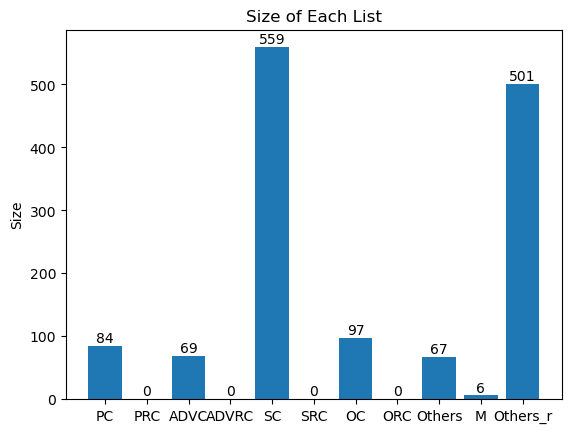

In [98]:
import penman

for x in pred_drs:
    penman.decode(x)


In [100]:
role_list= [ # newly added
        "Affectee",
        "FeatureOf",
        "Feature",
        # Manually added (not part of clf_signature.yaml)
        "InstanceOf",
        # --- From here down copied from clf_signature.yaml ---
        # Concept roles
        "Name",
        # Event roles
        "Agent",
        "Asset",
        "Attribute",
        "AttributeOf",
        "Beneficiary",
        "Causer",
        "Co-Agent",
        "Co-Patient",
        "Co-Theme",
        "Consumer",
        "Destination",
        "Duration",
        "Experiencer",
        "Finish",
        "Frequency",
        "Goal",
        "Instrument",
        "Instance",
        "Location",
        "Manner",
        "Material",
        "Path",
        "Patient",
        "Pivot",
        "Product",
        "Recipient",
        "Result",
        "Source",
        "Start",
        "Stimulus",
        "Theme",
        "Time",
        "Topic",
        "Value",
        # Concept roles
        "Bearer",
        "Colour",
        "ColourOf",
        "ContentOf",
        "Content",
        "Creator",
        "Degree",
        "MadeOf",
        # - Name
        "Of",
        "Operand",
        "Owner",
        "Part",
        "PartOf",
        "Player",
        "Quantity",
        "Role",
        "Sub",
        "SubOf",
        "Title",
        "Unit",
        "User",
        # Time roles
        "ClockTime",
        "DayOfMonth",
        "DayOfWeek",
        "Decade",
        "MonthOfYear",
        "YearOfCentury",
        # Other roles.
        "Affector",
        "Context",
        "Equal",
        "Extent",
        "Precondition",
        "Measure",
        "Cause",
        "Order",
        "Participant"]
print(len(role_list))

In [37]:
train_sbn = Path('/Users/shirleenyoung/Desktop/TODO/MA_Thesis/ud-boxer/data/pmb-5.0.0/split/en/train/gold.sbn').read_text().strip().split('\n\n')
train_sbn = [x.split('\n')[-1].split() for x in train_sbn]

roles_list =[]
for sbn in train_sbn:
    for tok in sbn:
        if tok in role_list:
            roles_list.append(tok)


In [41]:
from collections import Counter
role_count = Counter(roles_list).most_common()


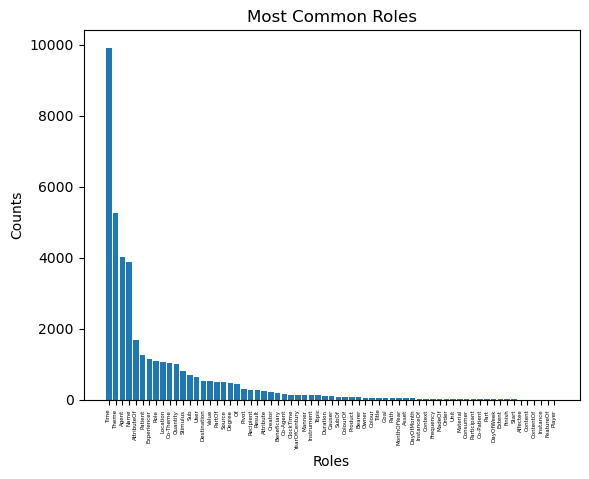

In [42]:
import matplotlib.pyplot as plt

roles, counts = zip(*role_count)

# Create a bar graph
plt.bar(roles, counts)
plt.xlabel('Roles')
plt.ylabel('Counts')
plt.xticks(rotation='vertical', fontsize=4)
plt.title('Most Common Roles')
plt.show()

In [47]:
import graphviz
from penman.codec import PENMANCodec
def visualize_parse(sbns, name):
    for i, d in enumerate(sbns):
        codec = PENMANCodec()
        node_label = {}
        dot = graphviz.Digraph('test', format='png')
        tris = codec.decode(d).triples
        for t in tris:
            if t[1] ==':instance':
                dot.node(t[0], t[2])
                node_label[t[0]] =t[2]
            else:
                dot.edge(t[0], t[2], label=t[1])
        dot.render(f'{name}/{i}')

In [49]:
sbns =['''(u_5509 / admire-01  :ARG0 (u_5496 / i)  :ARG1 (u_5499 / person  :mod (u_5508 / rude)  :ARG0-of (u_5498 / have-rel-role-91  :ARG2 (u_5497 / colleague))  :ARG1-of (u_5507 / have-rel-role-91  :ARG2 (u_5502 / friend)  :ARG0 (u_5500 / person  :ARG0-of (u_5503 / shy  :degree (u_5501 / quite))))  :ARG2-of (u_5505 / i  :ARG1 u_5509))  :ARG0-of (u_5506 / achieve-01  :ARG1 (u_5510 / ambition)  :manner (u_5504 / rapid)))
''',
       '''(u_5447 / satisfied-01  :ARG0 (u_5443 / cup  :ARG1-of (u_5442 / empty-01  :ARG0 (u_5448 / person  :mod (u_5441 / chubby)  :ARG0-of (u_5445 / have-rel-role-91  :ARG2 (u_5444 / friend)))))  :ARG1 (u_5440 / person  :ARG0-of (u_5449 / have-rel-role-91  :ARG2 (u_5446 / colleague)))  :time (u_5450 / yesterday))
''',
    '''(u_5458 / clean-01  :ARG0 (u_5460 / parent  :mod (u_5456 / timid  :degree (u_5467 / extreme))  :ARG1-of (u_5465 / admire-01  :ARG0 (u_5457 / person  :ARG0-of (u_5464 / guardian)  :ARG0-of (u_5459 / shy  :degree (u_5463 / quite)))  :time (u_5466 / _NAME_)))  :ARG1 (u_5461 / glasses)  :manner (u_5462 / lusty))
''']

visualize_parse(sbns, 'rel')

In [21]:
from pathlib import Path
enamr = Path('/Users/shirleenyoung/Downloads/Total-100GoldAMR.txt').read_text().strip().split('\n\n')
deamr = Path('/Users/shirleenyoung/Downloads/Total-100DeAMR-to-EN.txt').read_text().strip().split('\n\n')
smatch = Path('/Users/shirleenyoung/Desktop/smatch_results.txt').read_text().strip().split('\n')

In [22]:
print(len(enamr), len(deamr), len(smatch))

101 101 101


In [23]:
amr_comp =[]

for en, de, score in zip(enamr, deamr, smatch):
    score = score.split('\t')[-1]
    amr_comp.append((score, en, de))

In [31]:
amr_comp = sorted(amr_comp, key= lambda x:(float(x[0])))

In [32]:
amr_comp[0]

('0.125',
 '# ::id lpp_1943.568 ::date 2012-11-25T18:17:14 ::annotator ISI-AMR-05 ::preferred\n# ::snt " But there is nobody here to judge ! "\n# ::save-date Mon Apr 22, 2013 ::file lpp_1943_568.txt\n(n / nobody\n      :location (h / here)\n      :ARG1-of (j / judge-01))',
 '# ::id lpp_de.32 ::annotator CO\n# ::snt Aber es gibt doch niemanden , den man verurteilen könnte !\n(c / contrast-01\n    :ARG2 (g / give-01\n              :mode conclusive\n              :polarity -\n              :ARG1 (p / person\n                        :ARG1-of (c2 / convict-01))))')

In [33]:
amr_comp[-1]

('1.0',
 '# ::id DF-200-192400-625_6677.7 ::date 2013-09-05T03:28:46 ::annotator SDL-AMR-09 ::preferred\n# ::snt Just say no.\n# ::save-date Thu Sep 5, 2013 ::file DF-200-192400-625_6677_7.txt\n(s / say-01\n      :ARG0 (y / you)\n      :ARG1 (n / no)\n      :mod (j / just))',
 '# ::id DF-200-192400-625_6677.7 ::date 2013-09-05T03:28:46 ::annotator SDL-AMR-09 ::preferred\n# ::snt Sag einfach nein.\n(s / say-01\n      :ARG0 (y / you)\n      :ARG1 (n / no)\n      :mod (j / just))')

In [35]:
with open('smatch_100.txt', 'w') as sm:
    for score, en, de in amr_comp:
        sm.write(f'F: {score}\nEN:\n{en}\nTranslated DE:\n{de}\n\n')


In [4]:
import glob
from pathlib import Path


def output_rc(type_rc, output_rc):
    with open(output_rc, 'w') as objrc:
        objs = glob.glob(f'RNN-Priming/stimuli/*/*{type_rc}.txt')
        for o in objs:
            clauses = Path(o).read_text().strip().split('\n')
            for c in clauses:
                objrc.write(f'{c}\n')


In [5]:
object_rc = 'object_rc.txt'
object_reduced_rc = 'object_rrc.txt'
subject_rc = 'subject_rc.txt'
passive_rc = 'passive_rc.txt'
passive_reduced_rc = 'passive_rrc.txt'

output_rc('orc', object_rc)
output_rc('orrc', object_reduced_rc)
output_rc('src', subject_rc)
output_rc('prc', passive_rc)
output_rc('prrc', passive_reduced_rc)

In [38]:
src = Path('rc/subject_rc.txt').read_text().strip().split('\n')
prrc = Path('rc/passive_rrc.txt').read_text().strip().split('\n')
prc = Path('rc/passive_rc.txt').read_text().strip().split('\n')
orc = Path('rc/object_rc.txt').read_text().strip().split('\n')
orrc = Path('rc/object_rrc.txt').read_text().strip().split('\n')

In [40]:
import spacy
from spacy.tokens import Doc
def customtokenizer(text):
    return Doc(nlp.vocab, text.split())

nlp = spacy.load("en_core_web_sm")
with open('ud_train_orrc.amconll', 'w') as amconll:
    for j, sent in enumerate(orrc):
        j+=1
        amconll.write("#git::dakfl2343213rffdfvl\n")
        amconll.write("#framwork: unkonwn\n")
        amconll.write(f"#id:{j}\n")
        for i, token in enumerate(nlp(sent)):

            amconll.write(f'{i + 1}\t{token.text}\t{token.lemma_}\t{token.pos_}\t{token.tag_}\t{token.morph}\t{token.head.i+1}\t{token.dep_}\t_\t_\n')
        amconll.write('\n')




26.25092250922509